<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
!pip install tensorflow-decision-forests


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
import warnings
import tensorflow as tf
import tensorflow_decision_forests as tfdf

# Handling Data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.18.0
TensorFlow Decision Forests v1.11.0


# EXploring Data

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
train.shape

(8693, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
train = train.drop('Name', axis=1)


In [ ]:
test = test.drop('Name', axis=1)


In [ ]:
train = train.drop('HomePlanet', axis= 1)

In [ ]:
test = test.drop('HomePlanet', axis= 1)

In [ ]:
train

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [ ]:
train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train.isnull().sum().sort_values(ascending=False)

,0
Cabin,199
Destination,182
RoomService,181
Age,179
PassengerId,0
CryoSleep,0
VIP,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [ ]:
test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
test.isnull().sum().sort_values(ascending=False)

,0
Cabin,100
Destination,92
Age,91
RoomService,82
PassengerId,0
CryoSleep,0
VIP,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].median())


In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].median())


In [ ]:
train['Transported'] = train['Transported'].astype(int)

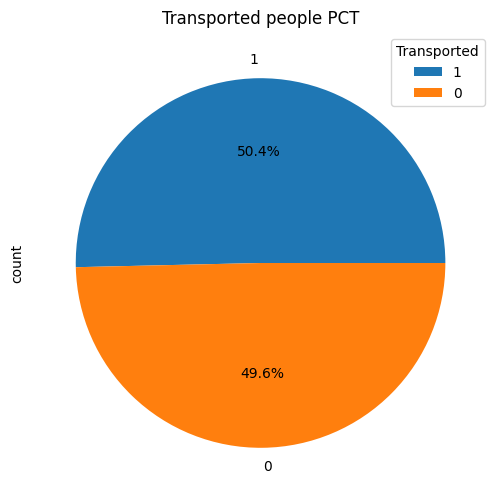

In [ ]:
train['Transported'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.legend(title="Transported")
plt.title('Transported people PCT')
plt.show()

In [ ]:
train['VIP'] = train['VIP'].astype(int)
train['CryoSleep'] = train['CryoSleep'].astype(int)

In [ ]:
test['VIP'] = test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

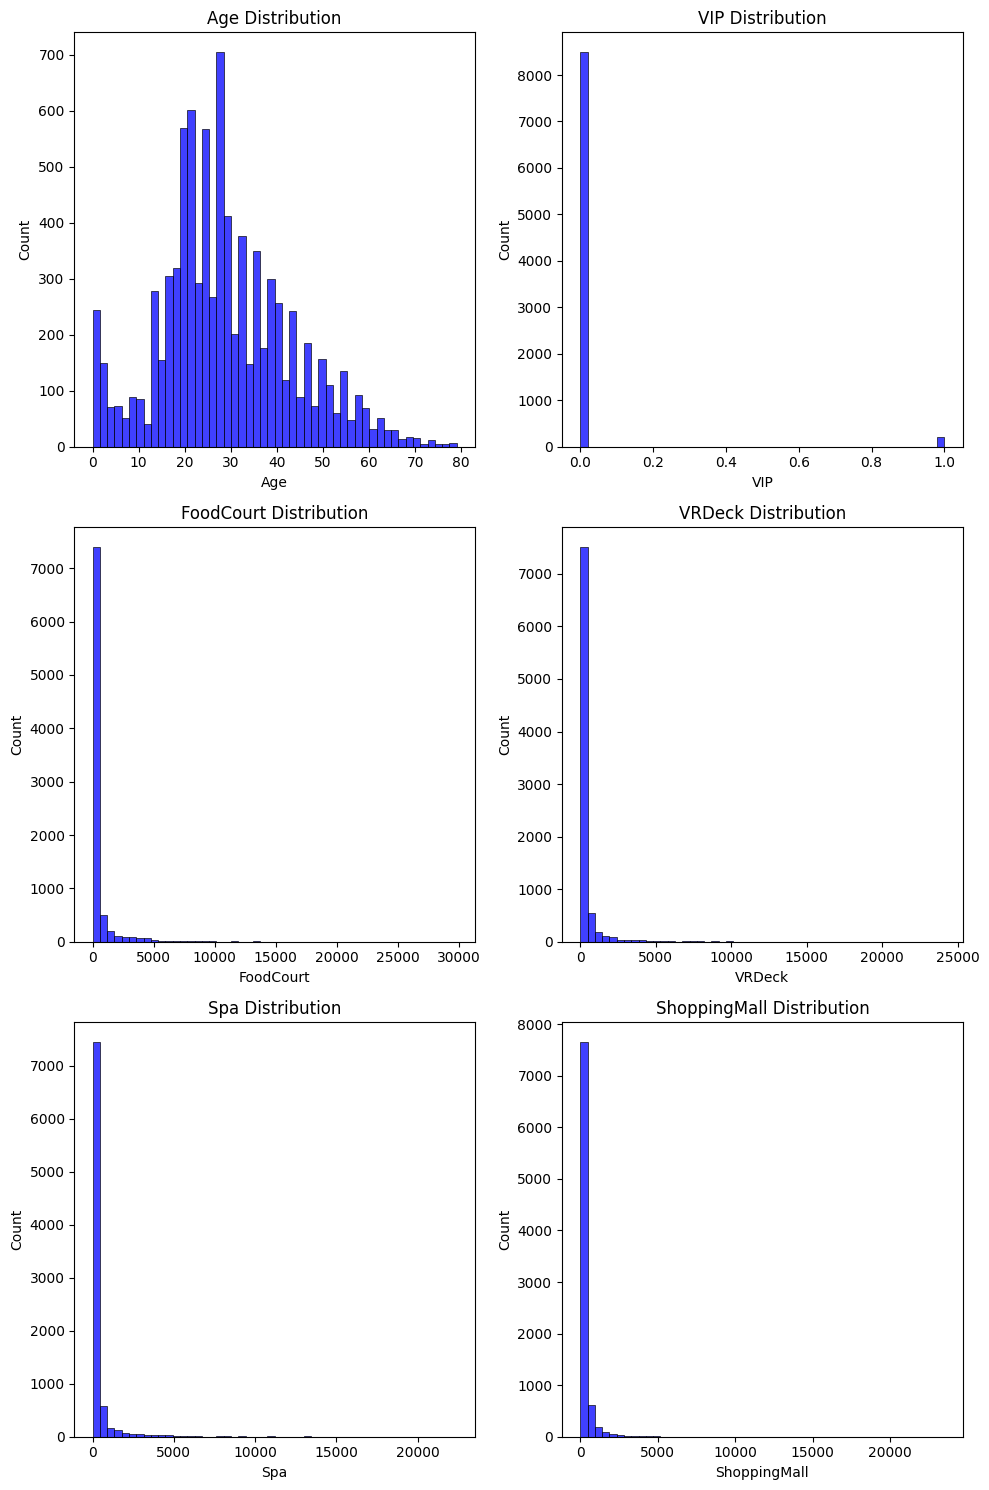

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

ax[0, 0].set_title('Age Distribution')
sns.histplot(train['Age'], color='b', bins=50, ax=ax[0, 0])

ax[0, 1].set_title('VIP Distribution')
sns.histplot(train['VIP'], color='b', bins=50, ax=ax[0, 1])

ax[1, 0].set_title('FoodCourt Distribution')
sns.histplot(train['FoodCourt'], color='b', bins=50, ax=ax[1, 0])

ax[1, 1].set_title('VRDeck Distribution')
sns.histplot(train['VRDeck'], color='b', bins=50, ax=ax[1, 1])

ax[2, 0].set_title('Spa Distribution')
sns.histplot(train['Spa'], color='b', bins=50, ax=ax[2, 0])

ax[2, 1].set_title('ShoppingMall Distribution')
sns.histplot(train['ShoppingMall'], color='b', bins=50, ax=ax[2, 1])

plt.tight_layout()
plt.show()


# Prepare the Dataset

In [ ]:
train['Cabin'].value_counts()

,count
Cabin,
G/734/S,8
G/109/P,7
B/201/P,7
G/1368/P,7
G/981/S,7
...,...
G/556/P,1
E/231/S,1
G/545/S,1


In [ ]:
train[['Deck','Cabin_num', 'Side']] = train['Cabin'].str.split('/', expand=True)

In [ ]:
test[['Deck','Cabin_num', 'Side']] = test['Cabin'].str.split('/', expand=True)

In [ ]:
train = train.drop('Cabin' , axis=1)

In [ ]:
test = test.drop('Cabin' , axis=1)

In [ ]:
x= train.drop('Transported' , axis=1)
y=train['Transported']

In [ ]:
x_train ,x_test, y_train ,y_test = train_test_split(x,y, test_size=.2)

In [ ]:
train_ds_pd = pd.concat([x_train, y_train], axis=1)
test_ds_pd = pd.concat([x_test, y_test], axis=1)


In [ ]:
label = 'Transported'  # Make sure this is your label column name
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [ ]:
train = train.drop('Destination' , axis=1)

In [ ]:
test = test.drop('Destination' , axis=1)

In [ ]:
train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S


In [ ]:
train.dtypes

,0
PassengerId,object
CryoSleep,int64
Age,float64
VIP,int64
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64
VRDeck,float64
Transported,int64


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
train['Deck'] = label_encoder.fit_transform(train['Deck'])
train['Cabin_num'] = label_encoder.fit_transform(train['Cabin_num'])
train['Side'] = label_encoder.fit_transform(train['Side'])


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
test['Deck'] = label_encoder.fit_transform(test['Deck'])
test['Cabin_num'] = label_encoder.fit_transform(test['Cabin_num'])
test['Side'] = label_encoder.fit_transform(test['Side'])


In [ ]:
print(train[['Deck', 'Cabin_num', 'Side']].head())


   Deck  Cabin_num  Side
0     1          0     0
1     5          0     1
2     0          0     1
3     0          0     1
4     5          1     1


In [ ]:
train.dtypes

,0
PassengerId,object
CryoSleep,int64
Age,float64
VIP,int64
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64
VRDeck,float64
Transported,int64


In [ ]:
train = train.drop('PassengerId' , axis=1)

In [ ]:
test = test.drop('PassengerId' , axis=1)

# Select Model

In [ ]:
Models = {
    'Logistic Regression': LogisticRegression(),
    'Gaussian Nb': GaussianNB(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
}



In [ ]:
def Modeling(model_name , model):
  print(f"Evaluating_model : {model_name}")
  model.fit(x,y)
  pre = model.predict(x_test)
  Accuracy = accuracy_score(pre , y_test)
  print(classification_report(pre , y_test))

In [ ]:
for madel_name , model in Models.items():
  Modeling(model_name , model)''

PassengerId       0
CryoSleep         0
Destination     149
Age               0
VIP               0
RoomService     155
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Deck            159
Cabin_num       159
Side            159
dtype: int64
PassengerId      0
CryoSleep        0
Destination     33
Age              0
VIP              0
RoomService     26
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Deck            40
Cabin_num       40
Side            40
dtype: int64


In [ ]:
test.dtypes

,0
CryoSleep,int64
Age,float64
VIP,int64
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64
VRDeck,float64
Deck,int64
Cabin_num,int64
